In [ ]:
#Exercise 1 (p.368, Chap.9), 2 (p.368, Chap.9), 4 (p.369, Chap.9), 7 (p.371, Chap.9) and 8 (p.371) 

In [ ]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)

# Chapter 9 Excercises

#### Exercise 1

In [12]:
# Generate sample data for 2-classes, separable
set.seed(1)
x <- matrix(rnorm(100 * 2), ncol=2)  
y <- c(rep(-10, 10), rep(1, 5)) 
x[y == 1, ] <- x[y == 1, ] + 3.5  
plot(x, y, type = "l", col = "red")
text(c(0), c(-20), "greater than 0", col = "red")
text(c(0), c(20), "less than 0", col = "red")
abline(x, 1 - y/2)


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


ERROR: Error in x[, c(1, 3)]: subscript out of bounds


In [ ]:
#### Exercise 2

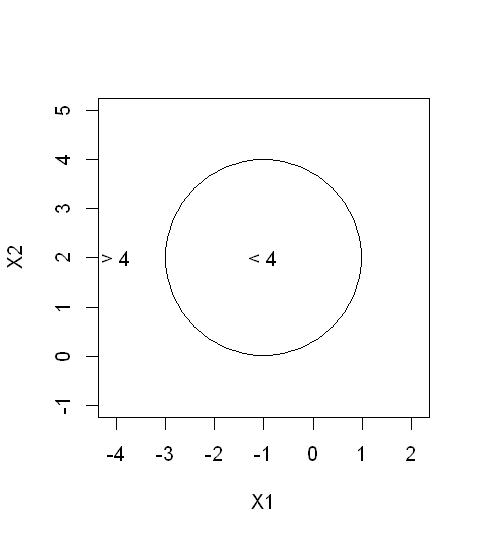

In [13]:
radius = 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")


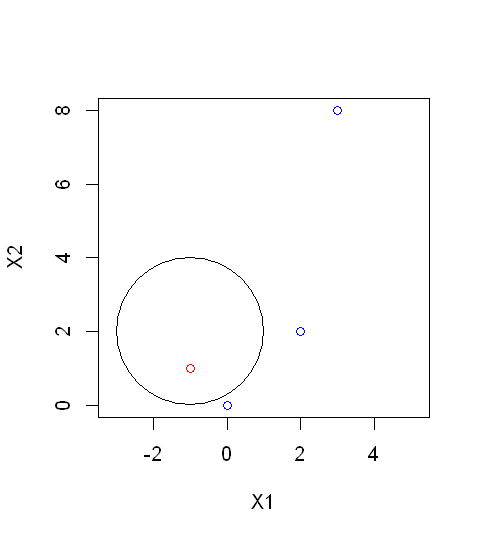

In [14]:
radius = 2
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(radius), add = TRUE, inches = FALSE)


In [ ]:
#### Exercise 4

In [16]:

set.seed(131)
x = rnorm(100)
y = 3 * x^2 + 4 + rnorm(100)
m = sample(100, 50)
y[m] = y[m] + 3
y[-m] = y[-m] - 3

In [19]:
z = rep(0, 100)
z[m] = 1
final.m = c(sample(m, 25), sample(setdiff(1:100, m), 25))
data.m = data.frame(x=x[final.m], y=y[final.m], z=as.factor(z[final.m]))
data.test = data.frame(x=x[-final.m], y=y[-final.m], z=as.factor(z[-final.m]))

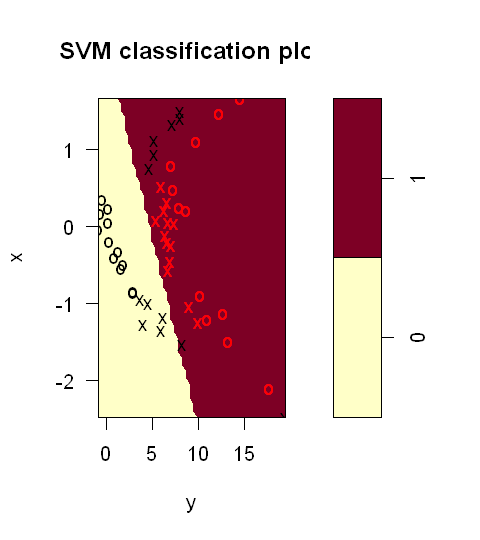

In [22]:
library(e1071)
svm.linear = svm(z~., data=data.m, kernel="linear", cost=10)
plot(svm.linear, data.m)

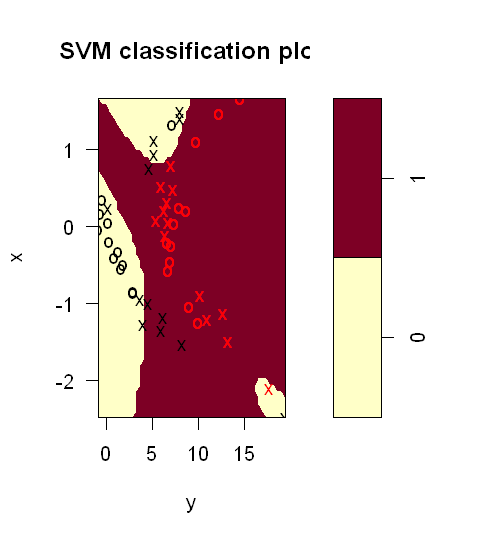

In [23]:
set.seed(200)
svm.poly = svm(z~., data=data.m, kernel="polynomial", cost=10)
plot(svm.poly, data.m)

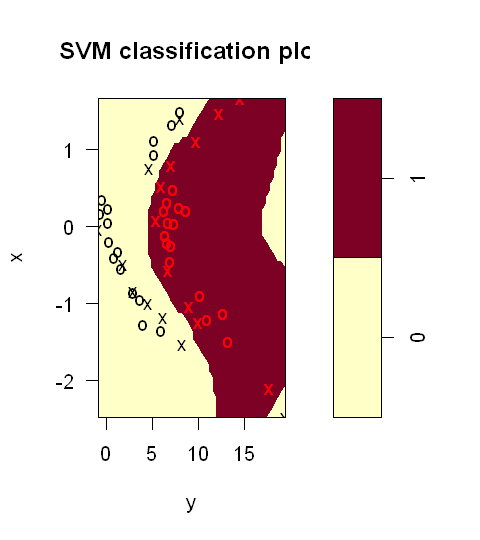

In [24]:
set.seed(996)
svm.radial = svm(z~., data=data.m, kernel="radial", gamma=1, cost=10)
plot(svm.radial, data.m)


In [ ]:
#### Exercise 7

In [30]:
#a
library(ISLR)

gasmedian = median(Auto$mpg)
abovemed = ifelse(Auto$mpg > gasmedian, 1, 0)
Auto$mpglevel = as.factor(abovemed)


In [31]:
#b
set.seed(200)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100)))
summary(tune.out)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01275641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07391026 0.04414558
2 1e-01 0.05352564 0.03264024
3 1e+00 0.01275641 0.01344780
4 5e+00 0.01525641 0.01764548
5 1e+01 0.01782051 0.01703462
6 1e+02 0.03570513 0.02751362


In [32]:
#c

set.seed(220)
tune.out = tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 
    0.1, 1, 5, 10, 100)))
summary(tune.out)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01019231 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07384615 0.04016276
2 1e-01 0.05083333 0.03751452
3 1e+00 0.01019231 0.01786828
4 5e+00 0.01788462 0.01727588
5 1e+01 0.02301282 0.02244393
6 1e+02 0.03833333 0.02763243


In [34]:
#d

svm.linear = svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly = svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 10, 
    degree = 2)
svm.radial = svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 10, gamma = 0.01)


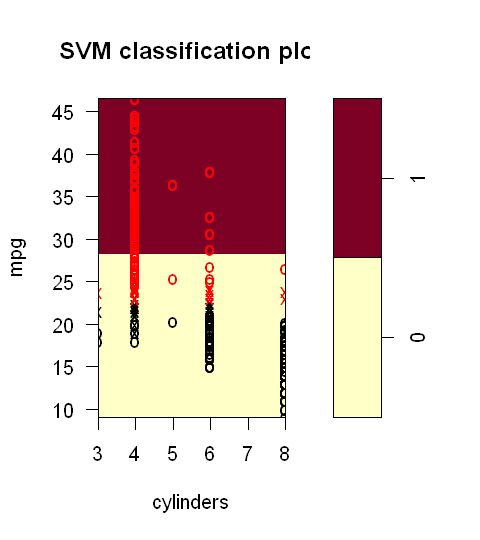

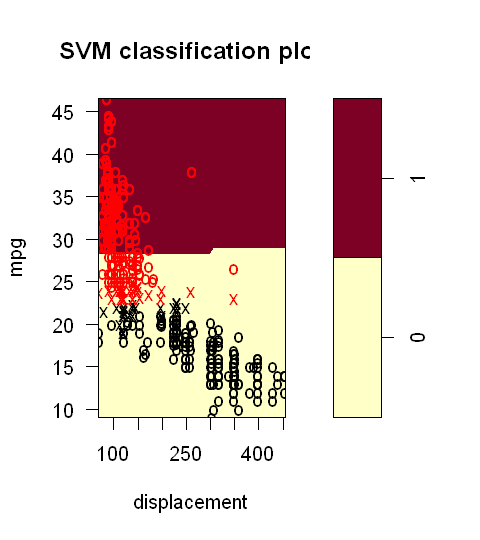

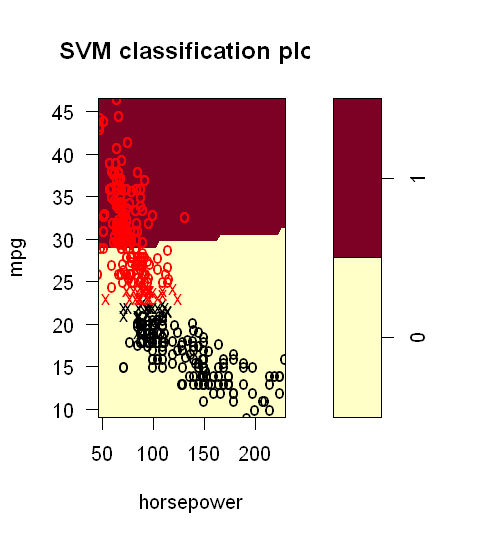

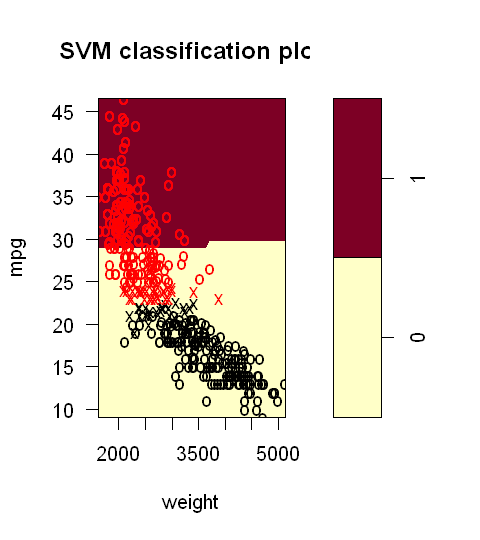

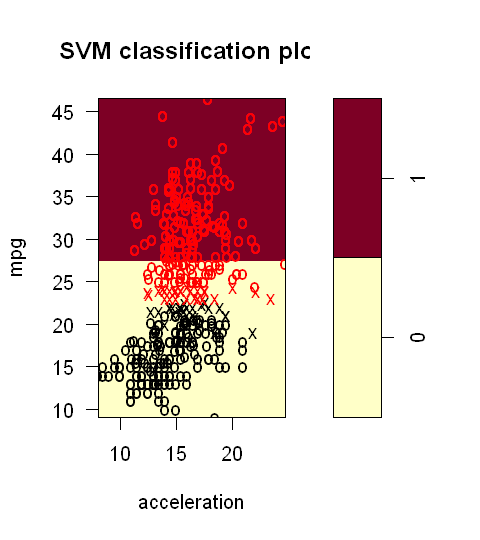

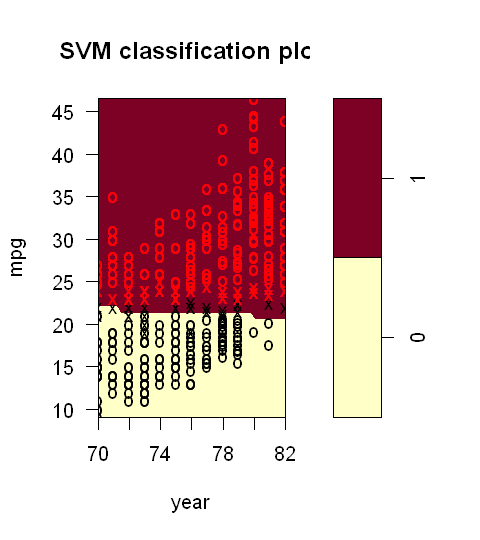

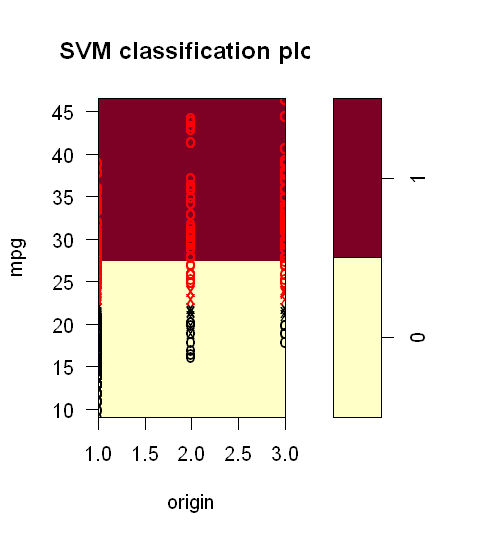

In [35]:
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

In [ ]:
#### Exercise 8

In [37]:
library(ISLR)
set.seed(100)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [38]:
#b

svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = 0.01)

In [40]:
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  432

 ( 216 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [39]:
#c

train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 433  55
  MM  78 234

In [41]:
a=(82 + 53)/(439 + 53 + 82 + 226)

In [42]:
a

[1] 0.16875

In [45]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 147  18
  MM  26  79

In [47]:
b=(19 + 29)/(142 + 19 + 29 + 80)
b

[1] 0.1777778

In [48]:
#d

set.seed(1554)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1575 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17250 0.04556741
2   0.01778279 0.17000 0.04216370
3   0.03162278 0.16500 0.03717451
4   0.05623413 0.15875 0.04126894
5   0.10000000 0.15750 0.04297932
6   0.17782794 0.16125 0.04226652
7   0.31622777 0.16375 0.04619178
8   0.56234133 0.16375 0.04619178
9   1.00000000 0.16250 0.04602234
10  1.77827941 0.16250 0.04602234
11  3.16227766 0.16500 0.04816061
12  5.62341325 0.16625 0.04715886
13 10.00000000 0.16500 0.05027701


In [49]:
#e
svm.linear = svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 427  61
  MM  63 249

In [50]:
test.pred = predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 140  25
  MM  27  78

In [51]:
c=(57 + 71)/(435 + 57 + 71 + 237)

In [52]:
d=(29 + 20)/(141 + 20 + 29 + 80)

In [61]:
c
d


[1] 0.16

[1] 0.1814815

The training error decreases to 16% but test error slightly increases to 18.1% by using best cost.

In [63]:
#f

set.seed(300)
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial")
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  368

 ( 187 181 )


Number of Classes:  2 

Levels: 
 CH MM




In [64]:
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 448  40
  MM  69 243

In [65]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 147  18
  MM  32  73

In [66]:
k=(40 + 78)/(452 + 40 + 78 + 230)

In [67]:
l= (27 + 15)/(146 + 15 + 27 + 82)

In [68]:
k
l

[1] 0.1475

[1] 0.1555556

 The classifier has a training error of 14.7% and a test error of 15.6% which is a slight improvement over linear kernel. 

In [70]:
set.seed(700)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.15625 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39000 0.04706674
2   0.01778279 0.39000 0.04706674
3   0.03162278 0.34625 0.07193989
4   0.05623413 0.19625 0.04641674
5   0.10000000 0.18375 0.04372023
6   0.17782794 0.17375 0.04466309
7   0.31622777 0.17250 0.04518481
8   0.56234133 0.16375 0.03793727
9   1.00000000 0.16000 0.03944053
10  1.77827941 0.15750 0.03129164
11  3.16227766 0.15625 0.03346329
12  5.62341325 0.15750 0.02958040
13 10.00000000 0.16625 0.04084609


In [71]:
svm.radial = svm(Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameters$cost)
train.pred = predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 448  40
  MM  71 241

In [72]:
test.pred = predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 146  19
  MM  33  72

In [73]:
#g
set.seed(400)
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 228 219 )


Number of Classes:  2 

Levels: 
 CH MM




In [74]:
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 458  30
  MM 105 207

In [75]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 152  13
  MM  45  60

In [76]:
(32 + 105)/(460 + 32 + 105 + 203)

[1] 0.17125

In [77]:
(12 + 37)/(149 + 12 + 37 + 72)

[1] 0.1814815

In [79]:
set.seed(440)
tune.out = tune(svm, Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, 
    ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 5.623413

- best performance: 0.17125 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39000 0.06003471
2   0.01778279 0.37375 0.06331414
3   0.03162278 0.36125 0.05665747
4   0.05623413 0.32750 0.05552777
5   0.10000000 0.32250 0.06992059
6   0.17782794 0.25500 0.07550754
7   0.31622777 0.21250 0.06346478
8   0.56234133 0.19875 0.05787019
9   1.00000000 0.19125 0.05272110
10  1.77827941 0.18500 0.06174545
11  3.16227766 0.17500 0.05803495
12  5.62341325 0.17125 0.05952649
13 10.00000000 0.17125 0.05952649


In [80]:
svm.poly = svm(Purchase ~ ., data = OJ.train, kernel = "poly", degree = 2, cost = tune.out$best.parameters$cost)
train.pred = predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 452  36
  MM  77 235

In [81]:
test.pred = predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 151  14
  MM  34  71

In [82]:
(37 + 84)/(455 + 37 + 84 + 224)

[1] 0.15125

In [83]:
(13 + 34)/(148 + 13 + 34 + 75)

[1] 0.1740741

Tuning reduces the training error to 15.12% and test error to 17.4%

h)
Overall, radial basis kernel seems to be producing minimum misclassification error on both train and test data.